<a href="https://colab.research.google.com/github/Jency07/Deep-learning-lab/blob/main/Image_Classification_SVM_20MAI0026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Classification Model Using SVM**

***1.Import libraries:***

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import img_to_array, array_to_img

***2. Mounting Gdrive***

In [ ]:
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***3. Loading Dataset***

Read the image file names from the csv and extract features from the image and store it in an array

In [ ]:
#Read the image file names from csv file
data = pd.read_csv('/content/gdrive/My Drive/classify_images/data.csv')


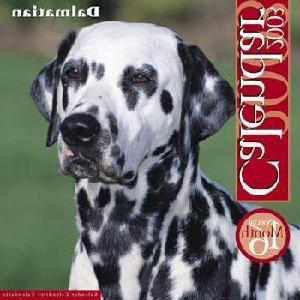

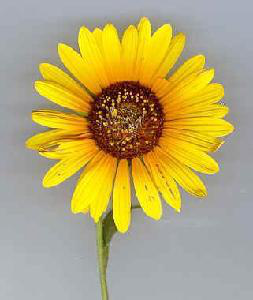

100%|██████████| 100/100 [00:01<00:00, 58.93it/s]


In [ ]:
#Load the image and extract features and storing in numpy array
from keras.preprocessing import image
train_image = []
#Display few images
img = imread('/content/gdrive/My Drive/classify_images/images/'+data['id'][1]+'.jpg')
im=array_to_img(img)
display(im)
img = imread('/content/gdrive/My Drive/classify_images/images/'+data['id'][51]+'.jpg')
im=array_to_img(img)
display(im)
for i in tqdm(range(data.shape[0])):
    img = imread('/content/gdrive/My Drive/classify_images/images/'+data['id'][i]+'.jpg')
    img_resized = resize(img, (64,64), anti_aliasing=True, mode='reflect')
    img = image.img_to_array(img_resized)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
y=data['label'].values

***4. Splitting the data for training and testing***

In [ ]:
#Data split using train test split -80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)
X_train1 = X_train.reshape(X_train.shape[0],X_train.shape[3]*X_train.shape[1]*X_train.shape[2])
X_test1 = X_test.reshape(X_test.shape[0],X_test.shape[3]*X_test.shape[1]*X_test.shape[2])

***5. Training the model***

In [ ]:
#Training the model using SVM
svm = SVC(kernel='rbf', probability=True, random_state=109)
svm=svm.fit(X_train1, y_train)

***6. Testing the model***

  0%|          | 0/20 [00:00<?, ?it/s]


****20MAI0026****

 Sunflower 

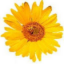

____________________________________________

 Sunflower 

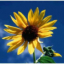

____________________________________________

 Sunflower 

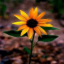

____________________________________________

 Sunflower 

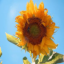

____________________________________________

 Sunflower 

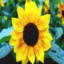

____________________________________________

 Sunflower 

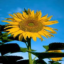

____________________________________________

 Sunflower 

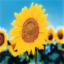

____________________________________________

 Dalmatian 

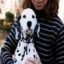

____________________________________________

 Dalmatian 

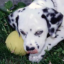

____________________________________________

 Sunflower 

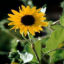

____________________________________________

 Sunflower 

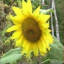

____________________________________________

 Dalmatian 

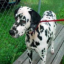

____________________________________________

 Dalmatian 

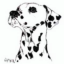

____________________________________________

 Sunflower 

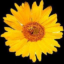

____________________________________________

 Sunflower 

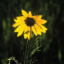

____________________________________________

 Sunflower 

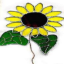

____________________________________________

 Dalmatian 

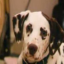

____________________________________________

 Dalmatian 

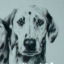

____________________________________________

 Sunflower 

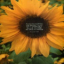

____________________________________________

 Dalmatian 

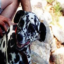

100%|██████████| 20/20 [00:00<00:00, 195.77it/s]

____________________________________________


In [ ]:
#Testing the model
#generate predictions
print("\n****20MAI0026****")
y_pred = svm.predict(X_test1)
for i in tqdm(range(X_test.shape[0])):
  image=array_to_img(X_test[i]*255)

  if(y_pred[i]==0):
    print('\n Dalmatian',end=" ")
  else:
    print('\n Sunflower',end=" ")
  display(image)
  print("____________________________________________")


***7. Evaluation of model metrics***

In [ ]:
print("\n****20MAI0026****")

#Display Classification report
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\n******************************")
print('Model accuracy is: ', accuracy)
print("\n******************************")


****20MAI0026****
Classification report for - 
GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00    